In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import socket as socket
import os as os
import sys as sys
import multiprocessing as mp

socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/punic_aDNA/"  # The Path on Midway Cluster
else:
    raise RuntimeWarning("No compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
# Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns

print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")

from hapsburg.figures.plot_bars import plot_panel_row, prepare_dfs_plot

### Hack for Basemaps
import mpl_toolkits
mpl_toolkits.__path__.append(
    '/n/groups/reich/hringbauer/explore_ntbk/jptvenv37/lib/python3.7/site-packages/basemap-1.2.1-py3.7-linux-x86_64.egg/mpl_toolkits/')
#from hapsburg.figures.plot_timelines import plot_map_time, extract_pop, prep_label
from hapsburg.figures.plot_individual_roh import plot_pde_individual, plot_roh_individual
from hapsburg.figures.plot_posterior import plot_posterior_cm

compute-e-16-236.o2.rc.hms.harvard.edu
HSM Computational partition detected.
/n/groups/reich/hringbauer/git/punic_aDNA
CPU Count: 28


## 1) Load ROH data

In [3]:
df1 = pd.read_csv("/n/groups/reich/hringbauer/hapsburg_runs/output/combined_roh05.v56.1.unique.tsv", sep='\t')
df1 = df1.sort_values(by="sum_roh>20", ascending=False)
print(f"Loaded {len(df1)} Individuals with ROH")

Loaded 20398 Individuals with ROH


In [4]:
iids_tun = ["I20824","I20825","I22580","I22866","I22867","I22862","I22577","I22852"]
dft=df1[df1["iid"].isin(iids_tun)]
print(f"Found {len(dft)} out of {len(iids_tun)} in ROH table")

Found 7 out of 8 in ROH table


In [ ]:
dft.to_csv("./output/dumpster/roh_summary_tunisia_meso_neo.tsv", sep="\t", index=None)
dft

In [ ]:
plot_dfs, cols = prepare_dfs_plot(dft, cms=[4, 8, 12, 20], col_group='loc')
labels = ["Djebba (~6000 BCE)", "Doukanet (~5000 BCE)", "Hergla (~4000 BCE)"]

plot_panel_row(plot_dfs[:], wspace=0.1, r_title=15, leg_pos=-2,
               figsize=(7, 3.5), titles=labels,
               ylim=[0, 400], hlines=[100,200,300, 400],
               degrees=[1,2,3], ticks_c=['1st C.', '2nd C.', '3rd C.'],
               savepath="./figures/div/roh_tunisia_meso_neo.pdf")

### With Context from other Nafr Sites

In [25]:
df2 = pd.read_csv(f"/n/groups/reich/hringbauer/hapsburg_runs/output/nafr.mark/combined_roh05.tsv", sep='\t')
plot_dfs2, cols2 = prepare_dfs_plot(df2, cms=[4, 8, 12, 20])

In [26]:
len(plot_dfs2)

6

In [27]:

plot_dfs_all = plot_dfs + plot_dfs2

Saved figure to ./figures/div/roh_tunisia_meso_neo_context.pdf


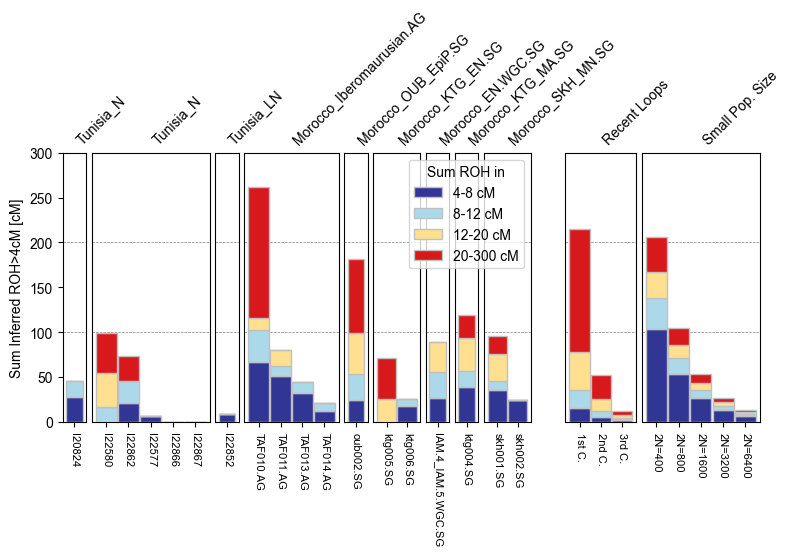

In [32]:
plot_panel_row(plot_dfs_all[:], wspace=0.1, r_title=45, leg_pos=-1,
               figsize=(9, 3.5), titles="",
               ylim=[0, 300], hlines=[100,200, 300, 400],
               degrees=[1,2,3], ticks_c=['1st C.', '2nd C.', '3rd C.'],
               savepath="./figures/div/roh_tunisia_meso_neo_context.pdf")

# 2) Ne estimates

## 2)a) Run indivdiual ROH (to save ROH lists)

In [27]:
from hapsburg.PackagesSupport.hapsburg_run import hapsb_ind  # Import to run single sample

In [39]:
dft2 = dft[dft["n_cov_snp"]>4e5]
iids = dft2["iid"].values

In [40]:
iids

array(['I22580', 'I22862', 'I22866', 'I22867', 'I20824', 'I22577',
       'I22852'], dtype=object)

In [41]:
for iid in iids:
    print(f"Running IID: {iid}")

    hapsb_ind(iid=iid, chs=range(1, 23), 
              path_targets="/n/groups/reich/DAVID/V56/V56.1/v56.1_1240k_all", # The path before the .ind, .snp, .geno
              h5_path1000g='/n/groups/reich/hringbauer/Data/1000G_hdf5s/chr', 
              meta_path_ref='/n/groups/reich/hringbauer/Data/1000G_hdf5s/meta_df_all.csv', 
              e_model="haploid",
              folder_out='/n/groups/reich/hringbauer/hapsburg_runs/output/Punic/',  # Folder where you want to save the results to 
              readcounts=False, random_allele = True,
              processes=6, delete = False, logfile = True, combine = True)

Running IID: I22580
Doing Individual I22580...
Set Output Log path: /n/groups/reich/hringbauer/hapsburg_runs/output/Punic/I22580/chr1/hmm_run_log.txtSet Output Log path: /n/groups/reich/hringbauer/hapsburg_runs/output/Punic/I22580/chr5/hmm_run_log.txt

Set Output Log path: /n/groups/reich/hringbauer/hapsburg_runs/output/Punic/I22580/chr3/hmm_run_log.txtSet Output Log path: /n/groups/reich/hringbauer/hapsburg_runs/output/Punic/I22580/chr2/hmm_run_log.txt
Set Output Log path: /n/groups/reich/hringbauer/hapsburg_runs/output/Punic/I22580/chr4/hmm_run_log.txt
Set Output Log path: /n/groups/reich/hringbauer/hapsburg_runs/output/Punic/I22580/chr6/hmm_run_log.txt

Combining Information for 22 Chromosomes...
Running IID: I22862
Doing Individual I22862...
Set Output Log path: /n/groups/reich/hringbauer/hapsburg_runs/output/Punic/I22862/chr2/hmm_run_log.txt
Set Output Log path: /n/groups/reich/hringbauer/hapsburg_runs/output/Punic/I22862/chr1/hmm_run_log.txt
Set Output Log path: /n/groups/reich/h

# 2) Estimate Ne from ROH values

In [44]:
from hapsburg.PackagesSupport.fit_ne import MLE_ROH_Ne, load_roh_vec

In [45]:
### Load ROH Vector
roh_vec = load_roh_vec(iids=iids, base_path = "/n/groups/reich/hringbauer/hapsburg_runs/output/Punic/", suffix="_roh_full.csv")

## 2a) Run for Djebba

In [50]:
%%time
iids = ["I20824"]
roh_vec = load_roh_vec(iids=iids, base_path = "/n/groups/reich/hringbauer/hapsburg_runs/output/Punic/", suffix="_roh_full.csv")

min_len = 4 # Min ROH length in cM to fit
max_len = 16 # Max ROH length in cM to fit

mle = MLE_ROH_Ne(start_params=1000, endog=roh_vec,
                 min_len=4, max_len=16,
                 chr_lgts=[],      # lengths of Chromosomes to fit (in cM). If len 0, use default for 1240K
                 error_model=False, output=False)
fit = mle.fit_ll_profile()
#summary = fit.summary()
mle.summary/2  # to get estimates in terms of Ne

CPU times: user 2.07 s, sys: 3.75 ms, total: 2.07 s
Wall time: 2.08 s


,coef,std err,0.025,0.975,n
0,636.905662,NaN,337.131112,1400.933278,0.5


### 2b) Run for Doukanet

In [54]:
iids = ["I22577", "I22866", "I22867"]
roh_vec = load_roh_vec(iids=iids, base_path = "/n/groups/reich/hringbauer/hapsburg_runs/output/Punic/", suffix="_roh_full.csv")

min_len = 4 # Min ROH length in cM to fit
max_len = 16 # Max ROH length in cM to fit

mle = MLE_ROH_Ne(start_params=1000, endog=roh_vec,
                 min_len=4, max_len=16,
                 chr_lgts=[],      # lengths of Chromosomes to fit (in cM). If len 0, use default for 1240K
                 error_model=False, output=False)
fit = mle.fit_ll_profile()
#summary = fit.summary()
mle.summary/2  # to get estimates in terms of Ne

,coef,std err,0.025,0.975,n
0,15540.410869,NaN,3538.505331,50000.0,1.5


### 2c) Run for Hergla

In [53]:
iids = ["I22852"]
roh_vec = load_roh_vec(iids=iids, base_path = "/n/groups/reich/hringbauer/hapsburg_runs/output/Punic/", suffix="_roh_full.csv")

min_len = 4 # Min ROH length in cM to fit
max_len = 16 # Max ROH length in cM to fit

mle = MLE_ROH_Ne(start_params=1000, endog=roh_vec,
                 min_len=4, max_len=16,
                 chr_lgts=[],      # lengths of Chromosomes to fit (in cM). If len 0, use default for 1240K
                 error_model=False, output=False)
fit = mle.fit_ll_profile()
#summary = fit.summary()
mle.summary/2  # to get estimates in terms of Ne

,coef,std err,0.025,0.975,n
0,2574.433725,NaN,828.302979,15540.410869,0.5
